# Feature Selection

## Load dữ liệu sau khi đã Label Encoding

In [20]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../data/processed/train_01.csv')

In [21]:
X = data.drop('Activity', axis=1)
y = data['Activity']
y[:-10].head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

## Sử dụng Mutual Information để đánh giá các đặc trưng

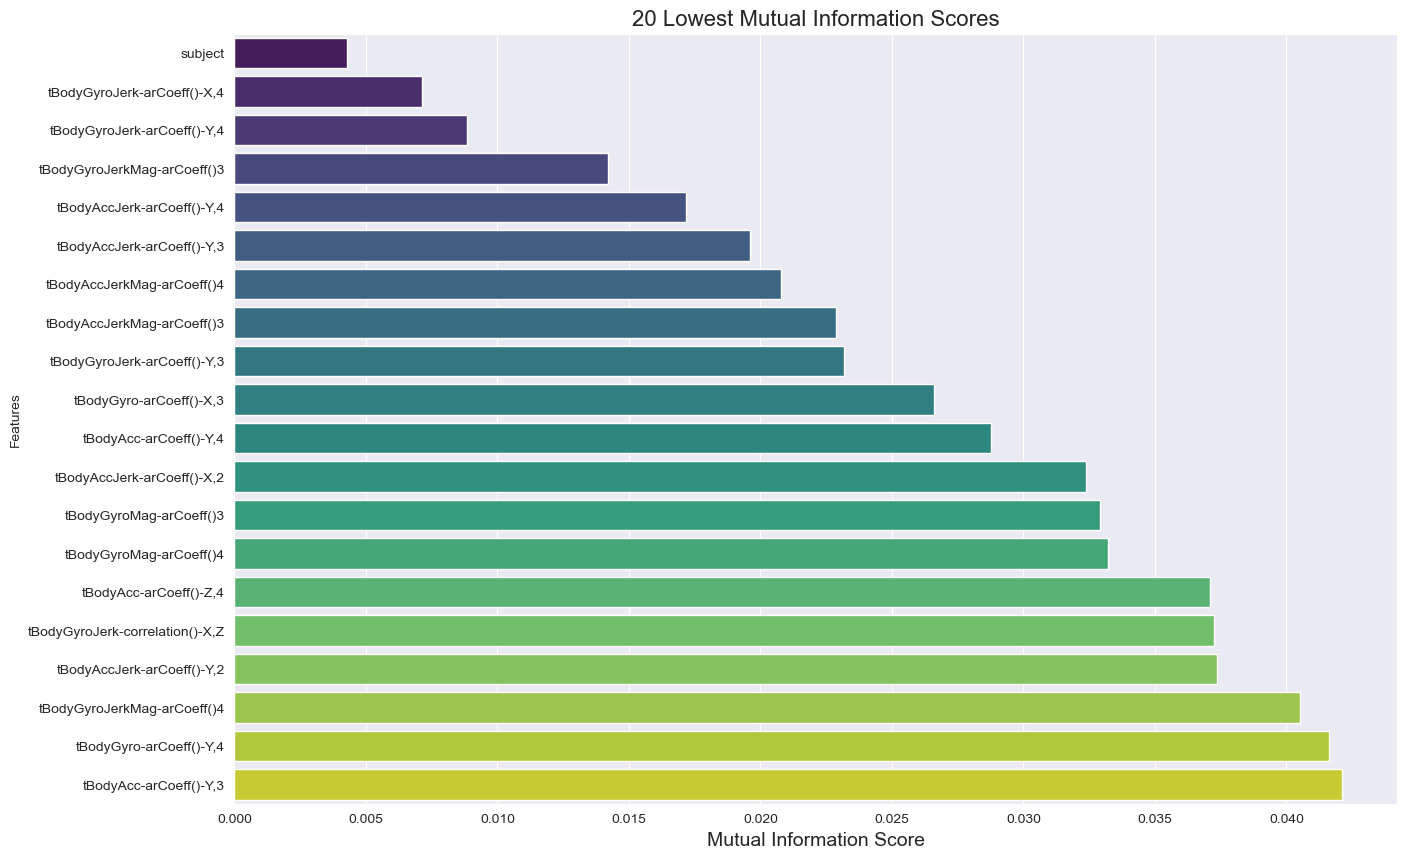

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Tính Mutual Information Score cho từng đặc trưng
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
# Lấy 20 giá trị thấp nhất
mi_scores_lowest = mi_scores.nsmallest(20)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(
    x=mi_scores_lowest.values,
    y=mi_scores_lowest.index,
    hue=mi_scores_lowest.index,
    palette='viridis',
    dodge=False
)

plt.title('20 Lowest Mutual Information Scores', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=14)
plt.ylabel('Features')
plt.show()

**Nhận xét:** 

* Có thể thấy subject (mã thứ tự của các tình nguyện viên) có Mutual Information Score thấp nhất.
* Điều này cho thấy subject không ảnh hưởng đến việc phân loại hoạt động. Đồng thời để đảm bảo sự công bằng trong thực tế rằng mô hình không dự đoán cho riêng 30 tình nguyện viên. Chúng tôi sẽ loại bỏ đặc trưng này khỏi tập dữ liệu.

## Loại bỏ đặc trưng 'subject'

In [23]:
data_train = pd.read_csv('../../data/processed/train_01.csv')
data_test = pd.read_csv('../../data/processed/test_01.csv')

data_train = data_train.drop('subject', axis=1)
data_test = data_test.drop('subject', axis=1)

## Lưu dữ liệu sau khi loại bỏ đặc trưng 'subject'

In [24]:
data_train.to_csv('../../data/interim/trainFinal.csv', index=False)
data_test.to_csv('../../data/interim/testFinal.csv', index=False)

print('Du lieu da duoc luu vao data/interim')

Du lieu da duoc luu vao data/interim
